## Inicialisation

In [600]:
import numpy as np
import pandas as pd
import statsmodels
import sklearn
import seaborn
import plotly
import matplotlib.pyplot as plt


In [601]:
# Main dataset
sales = pd.read_csv('../data/sales_train.csv')

# Data-Dicts
items = pd.read_csv('../data/dicts/items.csv')
items_categories = pd.read_csv('../data/dicts/item_categories.csv')
shops = pd.read_csv('../data/dicts/shops.csv')

# Folder - Sumbission data 
submission = pd.read_csv('../data/submission_data/sample_submission.csv')
# a sample submission file in the correct format.

test = pd.read_csv('../data/submission_data/test.csv') 
# the test set. You need to forecast the sales 
# for these shops and products for November 2015.

In [602]:
test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [603]:
sales.head(50)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


# DQC & ETL

## Feature  dTypes and simple statistics

In [604]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [605]:
sales['date'] = pd.to_datetime(sales['date'], format='%d.%m.%Y')
# sales_sorted = sales.sort_values('date')

In [606]:
with pd.option_context('display.float_format', '{:.1f}'.format):
    print(sales[['item_price','item_cnt_day']].describe())

       item_price  item_cnt_day
count   2935849.0     2935849.0
mean        890.9           1.2
std        1729.8           2.6
min          -1.0         -22.0
25%         249.0           1.0
50%         399.0           1.0
75%         999.0           1.0
max      307980.0        2169.0


## Missing values

In [607]:
sales.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

## Duplicates

In [608]:
sales.duplicated().sum()

6

In [609]:
sales[sales.duplicated(keep=False)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
76961,2013-01-05,0,54,20130,149.0,1.0
76962,2013-01-05,0,54,20130,149.0,1.0
1435365,2014-02-23,13,50,3423,999.0,1.0
1435367,2014-02-23,13,50,3423,999.0,1.0
1496765,2014-03-23,14,21,3423,999.0,1.0
1496766,2014-03-23,14,21,3423,999.0,1.0
1671872,2014-05-01,16,50,3423,999.0,1.0
1671873,2014-05-01,16,50,3423,999.0,1.0
1866322,2014-07-12,18,25,3423,999.0,1.0
1866340,2014-07-12,18,25,3423,999.0,1.0


Those duplicates should be removed, there small amount of them, but all of them are clearly missing structure which data table provides on the first place. Bc item_cnt_day should represent number of products sold for exact type of product, it's supposed to be agregated feature and cannot be duplicated. Also all of duplicated pares have the same price. 

In [610]:
sales = sales.drop_duplicates().reset_index(drop=True)

## Outliers

### Item prices

In [611]:
sales.shape[0]

2935843

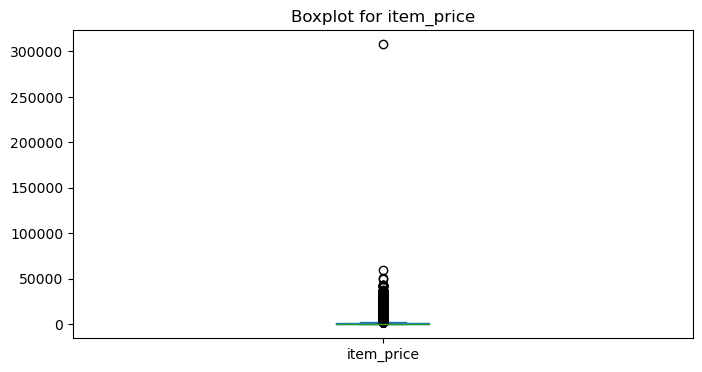

In [612]:
plt.figure(figsize=(8, 4))
sales['item_price'].plot.box()
plt.title('Boxplot for item_price')
plt.show()

Quatniles estimation:

In [613]:
item_price_q99 = sales['item_price'].quantile(0.99)
item_price_q01 = sales['item_price'].quantile(0.01)
print('quantile 99:', item_price_q99 )
print('item_price amount of observations higher than q99:',sales[sales['item_price']>item_price_q99]['item_id'].count())
print('-'*20)
print('quantile 01:',item_price_q01)
print('item_price amount of observations lower than q01:',sales[sales['item_price']<item_price_q01]['item_id'].count())

quantile 99: 5999.0
item_price amount of observations higher than q99: 28714
--------------------
quantile 01: 5.0
item_price amount of observations lower than q01: 6319


In [ ]:
print( sales[sales['item_price']<=0] ) # Observations with negative or zero price
sales['item_price'] = sales[sales['item_price'] > 0]['item_price'] # Assigning only positive price

             date  date_block_num  shop_id  item_id  item_price  item_cnt_day
484682 2013-05-15               4       32     2973        -1.0           1.0


As we can see, there a lot outliers there, and we cannot remove them, since we might remove some expensive categories entirely. We will use .clip() to round outliers to feasible values but will save data about prices outliers

In [615]:
sales['was_item_price_outlier'] = ( sales['item_price'] > item_price_q99 ).astype('int8')

In [616]:
sales['item_price'] = sales['item_price'].clip(0,item_price_q99)
sales.shape[0]

2935843

After Clipping: 

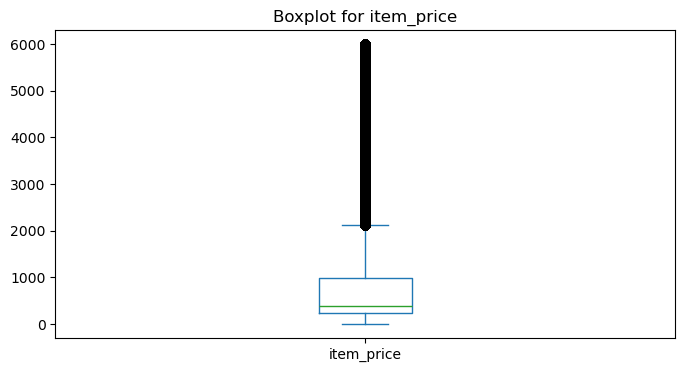

In [617]:
plt.figure(figsize=(8, 4))
sales['item_price'].plot.box()
plt.title('Boxplot for item_price')
plt.show()

Negative prices removed, outlier from higher bound are tagged and rounded to lower values

### Amount of items sold in a day, in a single shop

Let's check another quantative feature - amount of sold exact items_id by a single day

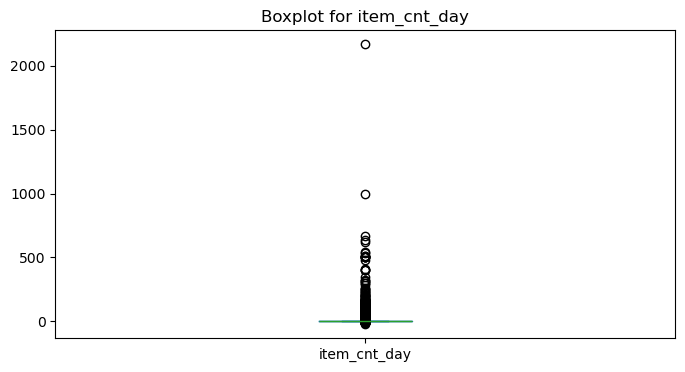

In [618]:
plt.figure(figsize=(8, 4))
sales['item_cnt_day'].plot.box()
plt.title('Boxplot for item_cnt_day')
plt.show()

From first glance on the main dataset also noted that item_cnt_day has some negative values, let's check it and do a quantile estimation:

In [619]:
item_cnt_day_q99 = sales['item_cnt_day'].quantile(0.99)
item_cnt_day_q01 = sales['item_cnt_day'].quantile(0.01)
print('quantile 99:', item_cnt_day_q99 )
print('item_cnt_day amount of observations higher than q99:',sales[sales['item_cnt_day']>item_cnt_day_q99]['item_id'].count())
print('-'*20)
print('quantile 01:',item_cnt_day_q01)
print('item_cnt_day amount of observations lower than q01:',sales[sales['item_cnt_day']<item_cnt_day_q01]['item_id'].count())

print('-'*20)
print('Amount of items listed as sold in amount of zero : ',sales[sales['item_cnt_day'] == 0]['item_cnt_day'].count()) 
print('Amount of unique items_id listed as sold in a negative amount: ',sales[sales['item_cnt_day']<0]['item_id'].nunique())

quantile 99: 5.0
item_cnt_day amount of observations higher than q99: 27411
--------------------
quantile 01: 1.0
item_cnt_day amount of observations lower than q01: 7356
--------------------
Amount of items listed as sold in amount of zero :  0
Amount of unique items_id listed as sold in a negative amount:  3511


Let's calculate how big part of returned items, out of all sold items overall

negative_sold_amount_sum:  -7541.0
positive_sold_amount_sum:  3655741.0
Percentage of returns comapre to all sold items: 0.21%


<Axes: >

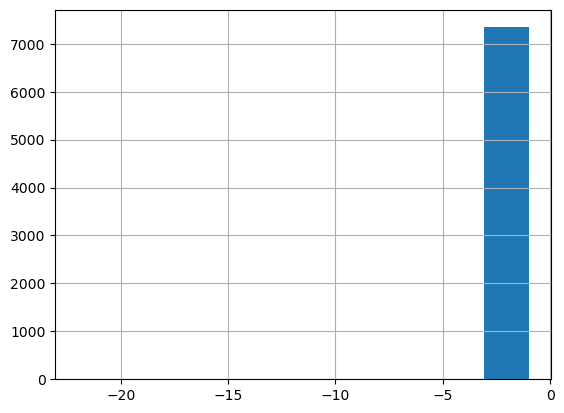

In [620]:
negative_sold_amount_sum = sales[sales['item_cnt_day']<0]['item_cnt_day'].sum() # sum of all returned back items
print('negative_sold_amount_sum: ', negative_sold_amount_sum)
positive_sold_amount_sum = sales[sales['item_cnt_day']>0]['item_cnt_day'].sum() # sum of all sold items 
print('positive_sold_amount_sum: ', positive_sold_amount_sum)
n_vs_p = negative_sold_amount_sum / positive_sold_amount_sum *100 *(-1)
print(f'Percentage of returns comapre to all sold items: {n_vs_p:.2f}%')
sales[sales['item_cnt_day'] < 0]['item_cnt_day'].hist()

As we can see amount of returns are too low (0.21%) to keep them in our main dataset. Maybe we will come back to it later, if we will discover this feature might be usefull. Removing negative values of intem_cnt_day :

In [621]:
with_negatives_sold = sales.shape[0]
sales = sales[sales['item_cnt_day'] > 0]
without_negatives_sold = sales.shape[0]
print('Amount of items before removing those with negative sales:',with_negatives_sold)
print('Amount of items after removing items with negative sales:',without_negatives_sold)
print('Removed Obeservation where items with negative sold amount by day :',with_negatives_sold-without_negatives_sold)
# sales['item_cnt_day'] = sales['item_cnt_day'].clip(0,500)

Amount of items before removing those with negative sales: 2935843
Amount of items after removing items with negative sales: 2928487
Removed Obeservation where items with negative sold amount by day : 7356


Also it's worth to clip outlying high values. But before let's check what are they

In [622]:
sales[sales['item_cnt_day']>100][:50] # ⚠️⚠️⚠️ Before applying - run "Adding shops, items, and categories names block" to see explicit data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,was_item_price_outlier
566158,2013-06-11,5,12,2808,999.000000,200.0,0
620236,2013-06-14,5,42,16787,2559.746729,107.0,0
836295,2013-08-29,7,12,2808,999.000000,150.0,0
845689,2013-09-18,8,42,3732,2521.211982,217.0,0
845702,2013-09-18,8,42,3734,2520.730769,104.0,0
853770,2013-09-18,8,43,3732,2507.273810,168.0,0
858691,2013-09-18,8,18,3732,2534.000000,156.0,0
862928,2013-09-17,8,25,3732,2545.135417,264.0,0
862944,2013-09-17,8,25,3734,2548.454545,110.0,0
868494,2013-09-05,8,25,2808,999.000000,133.0,0


Seems all of them are games related to day of releas of several top games, which is a rare event, we will cut off amount of them sold and create a feature "was_item_cnt_day_outlier". 

In [623]:
sales['was_item_cnt_day_outlier'] = ( sales['item_cnt_day'] >  item_cnt_day_q99 ).astype(np.int8)

In [624]:
sales['item_cnt_day'] = sales['item_cnt_day'].clip(0,item_cnt_day_q99)

"Returns" are removed, outliers with higher bound are tagged and rounded to 99th quantile value. 

## Inconsistencies

### Dicts values check

 Are all of the porvided id's are described in dicts ?

In [625]:
print('Amount of shop_id in main dataset which are not listed in shops dict: ' ,\
       sales['shop_id'].isin(shops['shop_id']).sum() - sales.shape[0])

Amount of shop_id in main dataset which are not listed in shops dict:  0


In [626]:
print('Amount of item_id in main dataset which are not listed in items dicts: ' ,\
      sales['item_id'].isin(items['item_id']).sum() - sales.shape[0])

Amount of item_id in main dataset which are not listed in items dicts:  0


Checking shops dictionary:

In [627]:
shops

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


shop_id's which duplicates each other :
 - 10 and 11 are the same
 - 1 and 58
 - 0 and 57
 - 40 and 39
 - 23 and 24

In [628]:
shop_id_replacements = {10: 11, 1: 58, 0: 57, 40: 39, 23: 24}

In [629]:
# test[test['shop_id'].isin(shop_id_replacements.keys())]['shop_id'].value_counts()

In [ ]:
for old_id, new_id in shop_id_replacements.items():
    if old_id in test['shop_id'].values and new_id in test['shop_id'].values:
        print(f'⚠️ Shops {old_id} and {new_id} duplicates each other in test')
    else:
        print(f'No simultaneous presence of {old_id} shop_id and {new_id} in test')

No simultaneous presence of 10 shop_id and 11 in test
No simultaneous presence of 1 shop_id and 58 in test
No simultaneous presence of 0 shop_id and 57 in test
No simultaneous presence of 40 shop_id and 39 in test
No simultaneous presence of 23 shop_id and 24 in test


In [631]:
sales['shop_id'] = sales['shop_id'].replace(shop_id_replacements)
test['shop_id'] = test['shop_id'].replace(shop_id_replacements)

### Adding shops, items, and categories names

Based on dictionaries values of shops, items, and categories. It would be good to add some additional categories with grouping categories_names by their type, and shops by cities. 

In [632]:
items_categories[0:50]

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
5,Аксессуары - PSVita,5
6,Аксессуары - XBOX 360,6
7,Аксессуары - XBOX ONE,7
8,Билеты (Цифра),8
9,Доставка товара,9


In [633]:
items_categories['general_item_category_name'] = items_categories['item_category_name'].\
    apply(lambda x: 'Игровые консоли'  if x.split()[0] == 'Игровые' else x.split()[0] )

In [634]:
items_categories[0:50]

,item_category_name,item_category_id,general_item_category_name
0,PC - Гарнитуры/Наушники,0,PC
1,Аксессуары - PS2,1,Аксессуары
2,Аксессуары - PS3,2,Аксессуары
3,Аксессуары - PS4,3,Аксессуары
4,Аксессуары - PSP,4,Аксессуары
5,Аксессуары - PSVita,5,Аксессуары
6,Аксессуары - XBOX 360,6,Аксессуары
7,Аксессуары - XBOX ONE,7,Аксессуары
8,Билеты (Цифра),8,Билеты
9,Доставка товара,9,Доставка


The same idea is better to apply to cities of shops

In [635]:
shops

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [636]:
shops['city'] = shops['shop_name'].apply(lambda x: 'Якутск'  if x.split()[0] == '!Якутск' else x.split()[0] )

In [637]:
sales = sales.merge(items, on='item_id', how='left')
sales = sales.merge(items_categories, on = 'item_category_id', how = 'left')
sales = sales.merge(shops, on = 'shop_id', how = 'left')

In [560]:
sales.sample(100)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,was_item_price_outlier,was_item_cnt_day_outlier,item_name,item_category_id,item_category_name,general_item_category_name,shop_name,city
1782442,2014-06-06,17,42,10947,299.0,1.0,0,0,ДЕТЯМ 333 Лучшие Детские Песни ч.1 МР3,57,Музыка - MP3,Музыка,"СПб ТК ""Невский Центр""",СПб
1012239,2013-10-13,9,7,10734,299.0,1.0,0,0,ДАША-ПУТЕШЕСТВЕННИЦА. ВЫПУСК 6,40,Кино - DVD,Кино,"Воронеж ТРЦ ""Максимир""",Воронеж
2405589,2015-01-03,24,2,21381,1499.0,1.0,0,0,ХОББИТ: ПУСТОШЬ СМАУГА (2 3D BD+2BD) железный ...,41,Кино - Коллекционное,Кино,"Адыгея ТЦ ""Мега""",Адыгея
127953,2013-02-13,1,43,31,629.0,1.0,0,0,007: КООРДИНАТЫ «СКАЙФОЛЛ» (BD),37,Кино - Blu-Ray,Кино,"СПб ТК ""Сенная""",СПб
1195301,2013-12-29,11,53,5822,1049.0,1.0,0,0,Playstation Store пополнение бумажника: Карта ...,35,Карты оплаты - PSN,Карты,"Уфа ТЦ ""Семья"" 2",Уфа
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020874,2014-09-19,20,56,5009,1999.0,1.0,0,0,"NBA Live 14 [PS4, русская документация]",20,Игры - PS4,Игры,"Чехов ТРЦ ""Карнавал""",Чехов
1521025,2014-03-27,14,31,15833,149.0,1.0,0,0,"НУ, ПОГОДИ! (1-8) (Регион)",40,Кино - DVD,Кино,"Москва ТЦ ""Семеновский""",Москва
1296110,2014-01-23,12,31,17792,349.0,1.0,0,0,РАПУНЦЕЛЬ. ЗАПУТАННАЯ ИСТОРИЯ (BD+DVD),37,Кино - Blu-Ray,Кино,"Москва ТЦ ""Семеновский""",Москва
1646131,2014-05-13,16,14,14829,799.0,1.0,0,0,МТГ(РУС): Базовый Выпуск 2014: Начальный набор...,65,Подарки - Настольные игры (компактные),Подарки,"Казань ТЦ ""ПаркХаус"" II",Казань


# EDA

In [555]:
sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,item_name,item_category_name
0,2013-01-02,0,59,22154,999.00,1.0,37,ЯВЛЕНИЕ 2012 (BD),Кино - Blu-Ray
1,2013-01-03,0,25,2552,899.00,1.0,58,DEEP PURPLE The House Of Blue Light LP,Музыка - Винил
2,2013-01-06,0,25,2554,1709.05,1.0,58,DEEP PURPLE Who Do You Think We Are LP,Музыка - Винил
3,2013-01-15,0,25,2555,1099.00,1.0,56,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),Музыка - CD фирменного производства
4,2013-01-10,0,25,2564,349.00,1.0,59,DEEP PURPLE Perihelion: Live In Concert DVD (К...,Музыка - Музыкальное видео
...,...,...,...,...,...,...,...,...,...
2928482,2015-10-10,33,25,7409,299.00,1.0,55,V/A Nu Jazz Selection (digipack),Музыка - CD локального производства
2928483,2015-10-09,33,25,7460,299.00,1.0,55,V/A The Golden Jazz Collection 1 2CD,Музыка - CD локального производства
2928484,2015-10-14,33,25,7459,349.00,1.0,55,V/A The Best Of The 3 Tenors,Музыка - CD локального производства
2928485,2015-10-22,33,25,7440,299.00,1.0,57,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),Музыка - MP3


<Axes: title={'center': 'Mean price of items across all shops by days'}, xlabel='date'>

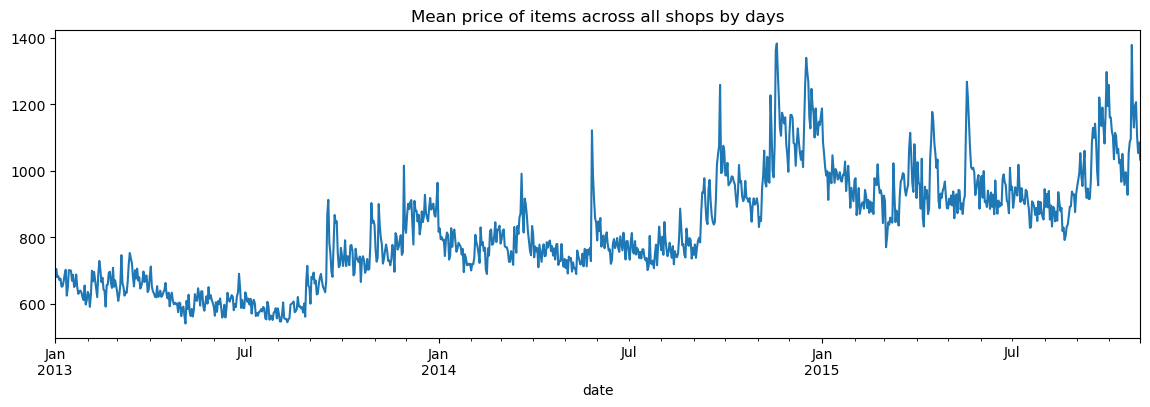

In [516]:
mean_item_prices_by_days = sales.groupby('date')['item_price'].mean()
mean_item_prices_by_days.plot(figsize=(14,4), title = 'Mean price of items across all shops by days')


<Axes: title={'center': 'Amount of sold items by days across all shops'}, xlabel='date'>

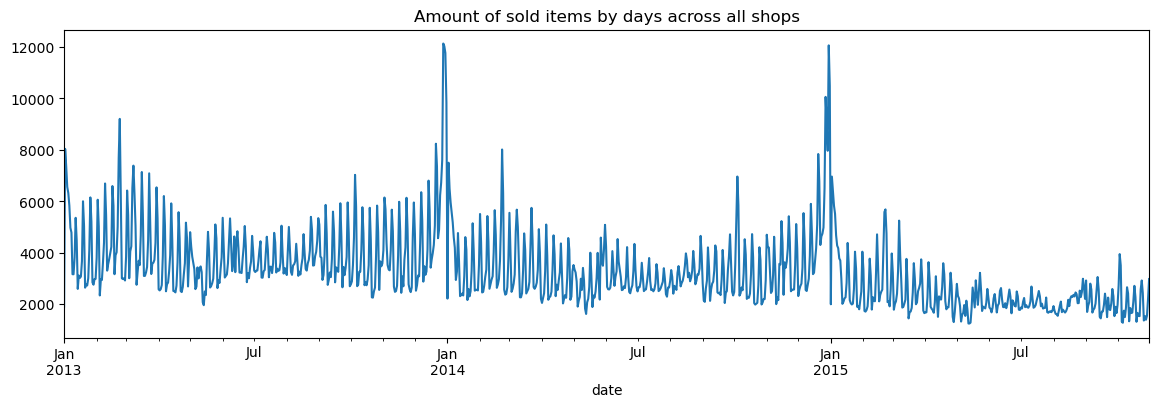

In [519]:
daily_sales = sales.groupby('date')['item_cnt_day'].sum()
daily_sales.plot(figsize=(14, 4), title='Amount of sold items by days across all shops')